# Project goal: Predict Cereal Yield

### Purpose: Find the best regression model to predict cereal yield

In [1]:
# Standard libraries
import pandas as pd
import numpy as np

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Customized functions
from linear_models_selection_CV import rsme, AdjR2s, LinearR, plot_yield_selected_country
from linear_models_selection_CV import tune_regularization_hyperparameter, run_time_series_KfoldCV

### Load the training and test datasets

In [2]:
# Load the pickled DataFrames from the data/processed folder
df = pd.read_pickle('df_train_clean.pickle')
df_test = pd.read_pickle('df_test_clean.pickle')

In [3]:
features = ['code', 'A', 'V', 'E', 'F', 'M', 'Gc', 'Dl', 'R', 'Tavg', 'Rmin']

### Hyperparameter optimization
#### Find the optimum alpha parameters for Lasso and Ridge regression models

In [4]:
#Extract the desired years for training dataset (Years 1991-2005 for training dataset and
#   Years 2006-2010 for validation dataset for hyperparameter optimization
df_X = df[(df['year']>='1991') & (df['year']<='2005')]
df_X_val = df[(df['year']>='2006') & (df['year']<='2010')]

# Extract the target, y
y_train = df_X['Ckg'] 
y_val = df_X_val['Ckg']
y_test = df_test['Ckg']

df_X = df_X.loc[:,features]
df_X_val = df_X_val.loc[:,features]
df_X_test = df_test.loc[:,features]

# Prepare the train_validation dataset
X_train_val = df.loc[:,features]
y_train_val = df['Ckg'] 

In [5]:
# Generate dummy variables for the countries' codes
X_train = pd.get_dummies(df_X, prefix='code', columns=['code'])
X_val = pd.get_dummies(df_X_val, prefix='code', columns=['code'])
X_test = pd.get_dummies(df_X_test, prefix='code', columns=['code'])
X_train_val = pd.get_dummies(X_train_val, prefix='code', columns=['code'])

In [6]:
# Constants
nfolds = 10
num_entity = 111   
has_intercept = True 
panelsubset_index = [i for i in range(0,20)]

In [7]:
# Lasso regression 
alphavec = np.linspace(0.001,2,99)
lasso_model, bestalpha, best_rmse = tune_regularization_hyperparameter('Lasso', alphavec, \
               X_train_val, y_train_val, nfolds, num_entity, panelsubset_index, has_intercept)
print("Lasso: best alpha = ", bestalpha)
test_set_pred = lasso_model.predict(X_test)
print("Lasso: RMSE for test data = ", np.sqrt(mean_squared_error(y_test, test_set_pred)))
print("Lasso: R2 for test data =", r2_score(y_test, test_set_pred))    

Lasso: best alpha =  0.001
Lasso: RMSE for test data =  1301.001535489341
Lasso: R2 for test data = 0.7678457016541187


In [8]:
# Ridge Regrssion
alphavec = np.linspace(0.01,2, 99)
ridge_model, bestalpha, best_rmse = tune_regularization_hyperparameter('Ridge', alphavec, \
                X_train_val, y_train_val, nfolds, num_entity, panelsubset_index, has_intercept)
print("Ridge: best alpha = ", bestalpha)
test_set_pred = ridge_model.predict(X_test)
print("Ridge: RMSE for test data = ", np.sqrt(mean_squared_error(y_test, test_set_pred)))
print("Ridge: R2 for test data =", r2_score(y_test, test_set_pred))

Ridge: best alpha =  0.01
Ridge: RMSE for test data =  1304.4288027152584
Ridge: R2 for test data = 0.7666209485620175


### Model selection
#### Linear, Lasso or Ridge regression model?

In [9]:
# Constants
nfolds = 10
num_entity = 111   
has_intercept = True 
panelsubset_index = [i for i in range(0,20)]
alpha_Lasso = 0.001
alpha_Ridge = 0.01

In [10]:
run_time_series_KfoldCV(X_train_val, y_train_val, nfolds, alpha_Lasso, alpha_Ridge, num_entity, panelsubset_index, has_intercept)


Linear Regression Average R^2: 0.868, std = 0.042
Lasso mean Average R^2: 0.853, std = 0.062
Ridge mean Average R^2: 0.868, std = 0.042

Linear Regression Average RMSE: 892.637, std = 148.787
Lasso mean Average RMSE: 930.557, std = 179.410
Ridge mean Average RMSE: 895.044, std = 149.003

Cross validation has completed.


### Best model is Linear Regression
#### Final round : Estimate the coefficients and predict the test dataset

Linear Regression: R^2 score:  0.7976707036057455
Linear Regression: Adjusted R^2 score:  0.7411306461837945
Linear Regression: RMSE:  1214.5595977106636


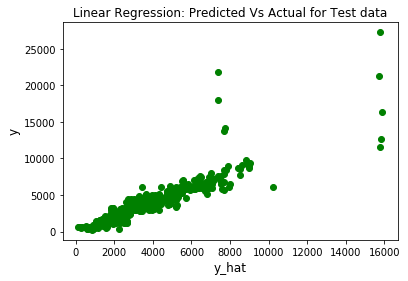

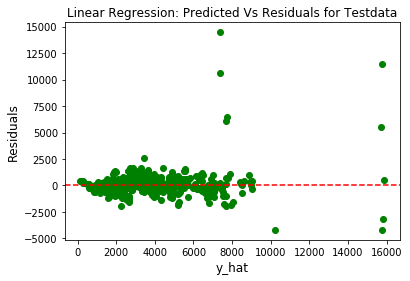

intercept 2604.828205752222

 The coefficients
               0
A      18.483559
V       6.792859
E     -19.903695
F       0.440364
M       0.346004
Gc      0.018951
Dl    325.238475
R     -30.691131
Tavg   54.479008
Rmin    1.252828


In [13]:
model = LinearR(X_train_val, y_train_val, X_test, y_test,features, has_intercept)

### Plot the predicted cereal yields for several countries
Markers are actual data (black = training data, blue = test data)

Lines are predicted training (megenta) and test dataset (red)

Comments: Some predictions are bad, while some are very good.

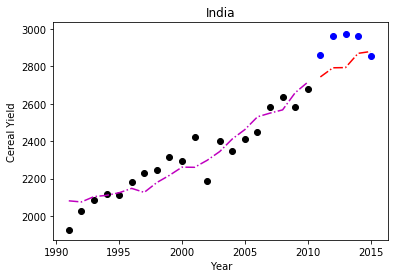

In [22]:
# India's predicted cereal yield
country_code = 'code_IND'
country_title = 'India'
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)
    

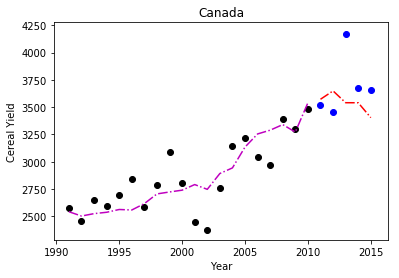

In [15]:
# Canada's predicted cereal yield
country_code = 'code_CAN' 
country_title = 'Canada'
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)

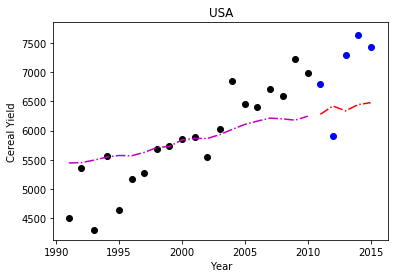

In [16]:
# USA's predicted cereal yield
country_code = 'code_USA'
country_title = 'USA'
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)

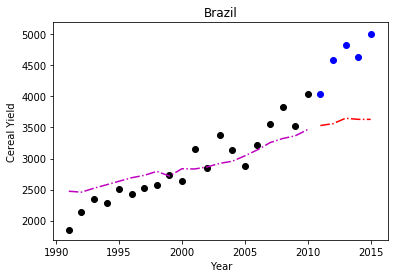

In [17]:
# Brazil's predicted cereal yield
country_code = 'code_BRA'
country_title = 'Brazil'
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)

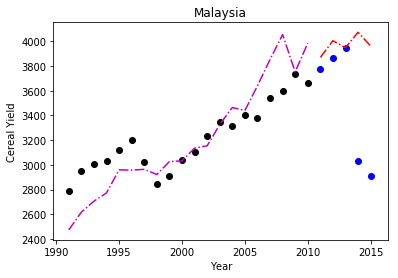

In [18]:
# Malaysia's predicted cereal yield
country_code = 'code_MYS' #'code_BRA'  #'code_USA'
country_title = 'Malaysia'
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)

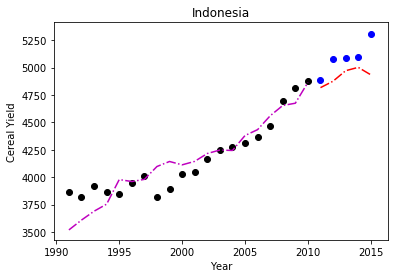

In [19]:
# Indonesia's predicted cereal yield
country_code = 'code_IDN'
country_title = 'Indonesia'
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)

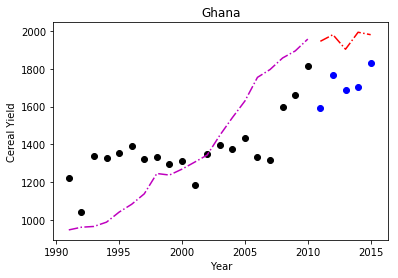

In [20]:
# Ghana's predicted cereal yield
country_code = 'code_GHA' 
country_title = 'Ghana' 
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)

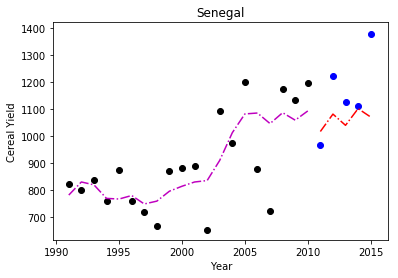

In [21]:
# Senegal's predicted cereal yield
country_code = 'code_SEN'
country_title = 'Senegal'
year1 = range(1991,2011)
year2 = range(2011,2016)
    
plot_yield_selected_country(model, country_code, year1, year2, \
                                country_title, X_train_val, y_train_val, \
                                X_test, y_test)